In [143]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
csvPath = "./chicago-west-nile-virus-mosquito-test-results/west-nile-virus-wnv-mosquito-test-results.csv"

In [94]:
## Read Data

df = pd.read_csv(csvPath, encoding="utf-8")
df.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
0,2018,39,47725,3XX W 104TH ST,T095,GRAVID,2018-09-27T00:09:00.000,5,negative,CULEX PIPIENS/RESTUANS,41.705328,-87.632955,"{'longitude': '-87.63295536539816', 'latitude'...",22.0,525.0,21861.0,45.0,45.0
1,2018,39,47718,82XX S KOSTNER AVE,T225,GRAVID,2018-09-27T00:09:00.000,1,negative,CULEX PIPIENS/RESTUANS,41.742670,-87.731550,"{'longitude': '-87.73155005887604', 'latitude'...",30.0,235.0,4300.0,69.0,23.0
2,2018,39,47706,48XX W MONTANA ST,T222,GRAVID,2018-09-27T00:09:00.000,1,negative,CULEX TERRITANS,41.925287,-87.747459,"{'longitude': '-87.74745912379434', 'latitude'...",17.0,304.0,22615.0,19.0,7.0
3,2018,39,47727,89XX S CARPENTER ST,T159,GRAVID,2018-09-27T00:09:00.000,1,negative,CULEX PIPIENS/RESTUANS,41.731447,-87.649722,"{'longitude': '-87.64972225277589', 'latitude'...",13.0,151.0,21554.0,72.0,18.0
4,2018,39,47708,1XX N CENTRAL PARK DR,T030B,SENTINEL,2018-09-27T00:09:00.000,49,negative,CULEX PIPIENS/RESTUANS,41.883711,-87.716092,"{'longitude': '-87.71609209177537', 'latitude'...",23.0,176.0,21572.0,28.0,11.0


In [182]:
df.describe()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015,TEST DATE INT
count,27196.000000,27196.000000,27196.000000,27196.000000,27196.000000,27196.000000,27196.000000,27196.000000,27196.000000,23087.000000,23087.000000,23087.000000,23087.000000,27196.000000,23087.000000,23087.000000,2.719600e+04
mean,2011.954148,31.094830,33998.621709,69.421569,92.197014,0.970768,12.487388,0.085969,2.297286,41.835456,-87.687833,28.860268,406.294148,21.489631,42.174774,31.658596,1.342686e+09
std,3.437942,4.499615,7968.708516,49.024429,55.361076,0.281419,15.458514,0.280323,0.982611,0.113315,0.076970,14.522238,244.861987,14.238034,21.158648,13.786049,1.083952e+08
min,2007.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,41.644720,-87.854473,1.000000,6.000000,0.000000,4.000000,1.000000,1.180397e+09
25%,2009.000000,28.000000,27138.750000,21.000000,42.000000,1.000000,2.000000,0.000000,2.000000,41.731447,-87.745420,19.000000,176.000000,10.000000,24.000000,20.000000,1.247789e+09
50%,2012.000000,31.000000,33978.500000,69.000000,96.000000,1.000000,5.000000,0.000000,2.000000,41.825398,-87.689417,29.000000,391.000000,23.000000,48.000000,34.000000,1.343348e+09
75%,2015.000000,35.000000,40915.250000,111.000000,142.000000,1.000000,17.000000,0.000000,3.000000,41.945961,-87.632955,43.000000,636.000000,34.000000,61.000000,45.000000,1.435191e+09
max,2018.000000,40.000000,47734.000000,157.000000,192.000000,3.000000,77.000000,1.000000,7.000000,42.017801,-87.531060,50.000000,787.000000,46.000000,77.000000,53.000000,1.538007e+09


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27196 entries, 0 to 27195
Data columns (total 18 columns):
SEASON YEAR                   27196 non-null int64
WEEK                          27196 non-null int64
TEST ID                       27196 non-null int64
BLOCK                         27196 non-null object
TRAP                          27196 non-null object
TRAP_TYPE                     27196 non-null object
TEST DATE                     27196 non-null object
NUMBER OF MOSQUITOES          27196 non-null int64
RESULT                        27196 non-null object
SPECIES                       27196 non-null object
LATITUDE                      23087 non-null float64
LONGITUDE                     23087 non-null float64
LOCATION                      23087 non-null object
Wards                         23087 non-null float64
Census Tracts                 23087 non-null float64
Zip Codes                     23087 non-null float64
Community Areas               23087 non-null float64
Histo

In [97]:
## Preprocess data

df['TEST DATE INT'] = pd.to_datetime(df['TEST DATE']).astype('int64')//1e9

nonNumCol = ['TRAP', 'BLOCK', 'TRAP_TYPE', 'RESULT', 'SPECIES', 'Zip Codes']
for col in nonNumCol:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

df_dropped = df.drop(columns=['LOCATION', 'TEST DATE', 'TEST ID', 'TRAP', 'TEST DATE INT'])
df_dropped = df_dropped.dropna()
df_dropped.head()

,SEASON YEAR,WEEK,BLOCK,TRAP_TYPE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
0,2018,39,78,1,5,0,2,41.705328,-87.632955,22.0,525.0,27,45.0,45.0
1,2018,39,145,1,1,0,2,41.742670,-87.731550,30.0,235.0,2,69.0,23.0
2,2018,39,93,1,1,0,6,41.925287,-87.747459,17.0,304.0,43,19.0,7.0
3,2018,39,147,1,1,0,2,41.731447,-87.649722,13.0,151.0,20,72.0,18.0
4,2018,39,40,3,49,0,2,41.883711,-87.716092,23.0,176.0,24,28.0,11.0


In [98]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23087 entries, 0 to 27194
Data columns (total 14 columns):
SEASON YEAR                   23087 non-null int64
WEEK                          23087 non-null int64
BLOCK                         23087 non-null int16
TRAP_TYPE                     23087 non-null int8
NUMBER OF MOSQUITOES          23087 non-null int64
RESULT                        23087 non-null int8
SPECIES                       23087 non-null int8
LATITUDE                      23087 non-null float64
LONGITUDE                     23087 non-null float64
Wards                         23087 non-null float64
Census Tracts                 23087 non-null float64
Zip Codes                     23087 non-null int8
Community Areas               23087 non-null float64
Historical Wards 2003-2015    23087 non-null float64
dtypes: float64(6), int16(1), int64(3), int8(4)
memory usage: 1.9 MB


In [99]:
X = df_dropped.to_numpy()

In [131]:
neigh = NearestNeighbors(2, 0.4)
neigh.fit(X)

In [132]:
dist, _ = neigh.kneighbors(X)
dist = dist[:,1]
max_dist = max(dist)
min_dist = min(dist)
avg_dist = sum(dist) / len(dist)
med_dist = np.median(dist)

print('Max distance: ', max_dist)
print('Min distance: ', min_dist)
print('Average distance: ', avg_dist)
print('Median distance: ', med_dist)

Max distance:  34.409304700312184
Min distance:  0.0
Average distance:  1.6765098523612254
Median distance:  1.4142135623730951


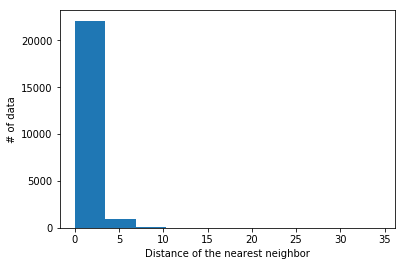

In [135]:
plt.hist(dist)
plt.ylabel('# of data')
plt.xlabel('Distance of the nearest neighbor')
plt.show()

In [124]:
neighbors = neigh.radius_neighbors(X, radius=max_dist, return_distance=False)
neighbors = np.array([len(x) for x in neighbors])

max_neighbors = max(neighbors)
min_neighbors = min(neighbors)
avg_neighbors = sum(neighbors) / len(neighbors)
med_neighbors = np.median(neighbors)
print('Max neighbors: ', max_neighbors)
print('Min neighbors: ', min_neighbors)
print('Average distance: ', avg_neighbors)
print('Median distance: ', med_neighbors)

Max neighbors:  966
Min neighbors:  1
Average distance:  330.25984320180186
Median distance:  311.0


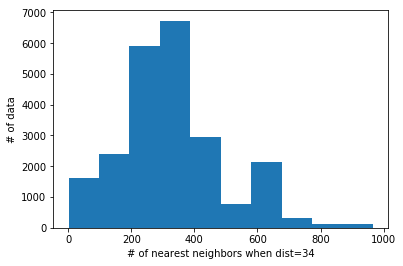

In [138]:
plt.hist(neighbors)
plt.ylabel('# of data')
plt.xlabel('# of nearest neighbors when dist=%d' % max_dist)
plt.show()

In [163]:
eps=35
mins=200

In [164]:
## Clustering

dbscan = DBSCAN(eps=eps, min_samples=mins)
labels = dbscan.fit_predict(X)

label, count = np.unique(labels, return_counts=True)
label_dict = dict(zip(label, count))
print(label_dict)

{-1: 2096, 0: 255, 1: 297, 2: 226, 3: 387, 4: 441, 5: 490, 6: 486, 7: 399, 8: 282, 9: 721, 10: 896, 11: 379, 12: 782, 13: 356, 14: 439, 15: 966, 16: 260, 17: 501, 18: 325, 19: 644, 20: 346, 21: 329, 22: 279, 23: 725, 24: 349, 25: 606, 26: 334, 27: 551, 28: 291, 29: 464, 30: 400, 31: 247, 32: 460, 33: 241, 34: 247, 35: 317, 36: 305, 37: 246, 38: 353, 39: 681, 40: 274, 41: 300, 42: 279, 43: 250, 44: 204, 45: 367, 46: 341, 47: 220, 48: 372, 49: 204, 50: 206, 51: 226, 52: 233, 53: 212}


In [162]:
## Evaluate

silhouette_avg = silhouette_score(X, labels)
print('The average silhouette_score is : ', silhouette_avg)

The average silhouette_score is :  0.5197390553145294


In [166]:
count_sorted = np.sort(count)
print(count_sorted[-2])

966


In [168]:
df_dropped['CLUSTERS'] = labels

In [170]:
df_dropped.head()

,SEASON YEAR,WEEK,BLOCK,TRAP_TYPE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015,CLUSTERS
0,2018,39,78,1,5,0,2,41.705328,-87.632955,22.0,525.0,27,45.0,45.0,0
1,2018,39,145,1,1,0,2,41.742670,-87.731550,30.0,235.0,2,69.0,23.0,1
2,2018,39,93,1,1,0,6,41.925287,-87.747459,17.0,304.0,43,19.0,7.0,2
3,2018,39,147,1,1,0,2,41.731447,-87.649722,13.0,151.0,20,72.0,18.0,3
4,2018,39,40,3,49,0,2,41.883711,-87.716092,23.0,176.0,24,28.0,11.0,5


In [173]:
## Analysis

numCols = ['NUMBER OF MOSQUITOES', 'CLUSTERS']
display(df_dropped[numCols].groupby(['CLUSTERS']).mean())

,NUMBER OF MOSQUITOES
CLUSTERS,
-1,6.775286
0,6.188235
1,13.616162
2,8.654867
3,11.997416
4,17.723356
5,13.277551
6,6.796296
7,13.498747
